# Weather 2012 Data set

We have hourly data for the weather conditions for one year
<br> we will perform some analysis on this data

In [1]:
#first import pandas
import pandas as pd

this is how the data looks like in weather_2012.csv file

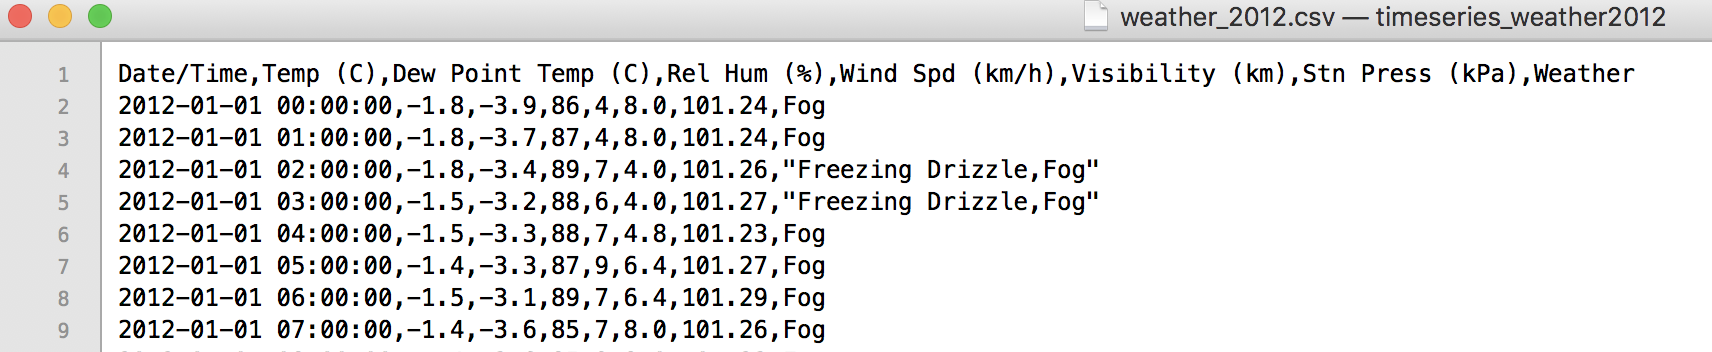

Read the data from the file into a dataframe object

In [2]:
data=pd.read_csv("weather_2012.csv",skiprows=1,header=None,
  names=["DateTime","Temp","DewPointTemp",
         "RelHum","WindSpeed","Visibility","StnPress" ,"Weather"])

See the top of the dataframe

In [9]:
data.head()

,DateTime,Temp,DewPointTemp,RelHum,WindSpeed,Visibility,StnPress,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Assing the data type of DateTime column as datetime objects

In [10]:
data.DateTime=pd.to_datetime(data.DateTime,format="%Y-%m-%d %H:%M:%S")

In [11]:
data.DateTime.dtype

dtype('<M8[ns]')

Set this DateTime column as the index of the data frame

In [12]:
data.set_index("DateTime",inplace=True)

Check the top of the dataframe 

In [13]:
data.head()

,Temp,DewPointTemp,RelHum,WindSpeed,Visibility,StnPress,Weather
DateTime,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Calculate daily min,average and max temperatures.

In [14]:
daily_temp=data.resample("D").Temp.agg(["min","mean","max"])

check the top of the data frame

In [15]:
daily_temp.head()

,min,mean,max
DateTime,,,
2012-01-01,-1.8,0.629167,5.3
2012-01-02,-7.4,0.041667,5.2
2012-01-03,-17.3,-14.416667,-9.0
2012-01-04,-18.6,-13.645833,-7.6
2012-01-05,-9.9,-6.750000,-4.1


Plot this data

<AxesSubplot:xlabel='DateTime'>

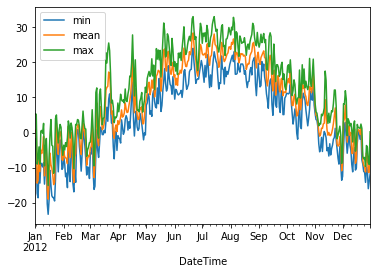

In [16]:
daily_temp.plot()

Suppose, we would like to analyze how visibility changes during the day in a particular month
<br> to do this, calculate the average visibility over the days for each hour

since index is a time object we can get hour and month information from the index

In [17]:
data.head()

,Temp,DewPointTemp,RelHum,WindSpeed,Visibility,StnPress,Weather
DateTime,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [18]:
data["hour"]=data.index.hour
data["month"]=data.index.month
data.head()

,Temp,DewPointTemp,RelHum,WindSpeed,Visibility,StnPress,Weather,hour,month
DateTime,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,1
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,1


Now, we can use groupby function to group data on months and hours

In [19]:
visdata=data.groupby(["month","hour"]).Visibility.mean()

In [21]:
visdata.head(10)

month  hour
1      0       20.858065
       1       21.716129
       2       20.416129
       3       20.309677
       4       19.916129
       5       19.996774
       6       19.548387
       7       20.203226
       8       22.254839
       9       24.693548
Name: Visibility, dtype: float64

Get the result for january

In [22]:
visdata.loc[1]

hour
0     20.858065
1     21.716129
2     20.416129
3     20.309677
4     19.916129
5     19.996774
6     19.548387
7     20.203226
8     22.254839
9     24.693548
10    24.254839
11    25.200000
12    25.225806
13    25.161290
14    26.580645
15    26.122581
16    24.887097
17    22.764516
18    19.309677
19    19.641935
20    19.983871
21    20.100000
22    21.300000
23    19.961290
Name: Visibility, dtype: float64

Get the result from january to march only for hours between 10 to 16

In [23]:
visdata.head()

month  hour
1      0       20.858065
       1       21.716129
       2       20.416129
       3       20.309677
       4       19.916129
Name: Visibility, dtype: float64

In [36]:
visdata.loc[1:3,10:16].unstack()

hour,10,11,12,13,14,15,16
month,,,,,,,
1,24.254839,25.200000,25.225806,25.161290,26.580645,26.122581,24.887097
2,29.368966,30.775862,31.527586,31.375862,30.582759,31.275862,31.168966
3,28.512903,29.674194,32.677419,33.158065,32.996774,32.648387,33.587097


Let's plot the data for january and july

<AxesSubplot:xlabel='hour'>

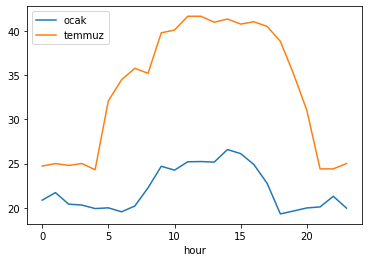

In [28]:
visdata.loc[1].plot(label="ocak",legend=True)
visdata.loc[7].plot(label="temmuz",legend=True)


## Plot in a bar chart total hours for rain,fog and clear weather

let's remember our data again

In [29]:
data.head()

,Temp,DewPointTemp,RelHum,WindSpeed,Visibility,StnPress,Weather,hour,month
DateTime,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,1
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,1


Get all the rows that contain "fog" in the weather column
<br> create new dataframe called fogdata

In [33]:
data[data.Weather.str.contains("[Ff]og",)]

,Temp,DewPointTemp,RelHum,WindSpeed,Visibility,StnPress,Weather,hour,month
DateTime,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,1
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,1
...,...,...,...,...,...,...,...,...,...
2012-12-30 03:00:00,-9.1,-10.4,90,11,3.6,100.30,"Snow,Fog",3,12
2012-12-30 04:00:00,-9.3,-10.6,90,13,9.7,100.28,"Snow,Fog",4,12
2012-12-30 05:00:00,-9.1,-10.4,90,11,4.0,100.32,"Snow,Fog",5,12


In [34]:
fogdata=data[data.Weather.str.contains("[Ff]og",)]

In [35]:
fogdata.head()

,Temp,DewPointTemp,RelHum,WindSpeed,Visibility,StnPress,Weather,hour,month
DateTime,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,1
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,1


In [ ]:
fogdata.tail()

Now, calculate total number of hours in each month for "fog" weather

In [ ]:
monthly_foghours=fogdata.

In [ ]:
monthly_foghours.head()

Do the same calculation for "Clean" and "Rain" weathers

In [ ]:
cleardata=
monthly_clearhours=
monthly_clearhours.head()


In [ ]:
raindata=data
monthly_rainhours=
monthly_rainhours.head()

We have three series , we will make a dataframe from these series using pd.concat function
<br> before doing that, we will name our series

In [ ]:
monthly_foghours
monthly_rainhours
monthly_clearhours


check monthly_rainhours again

In [ ]:
monthly_rainhours.head()

now create a dataframe called "result"

In [ ]:
result


In [ ]:
result.head()

In [ ]:
result.plot.bar()

x axis does not look very nice!
<br> change index into a different format

In [ ]:
result.index= #changing index to month names


In [ ]:
result.head()

In [ ]:
result.plot.bar(rot=45)